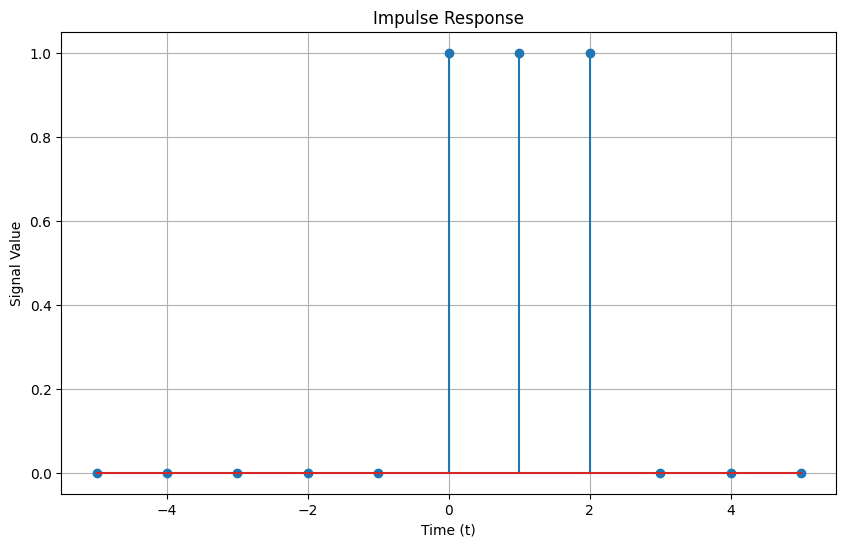

Plot saved as Discrete/Impulse Response.png


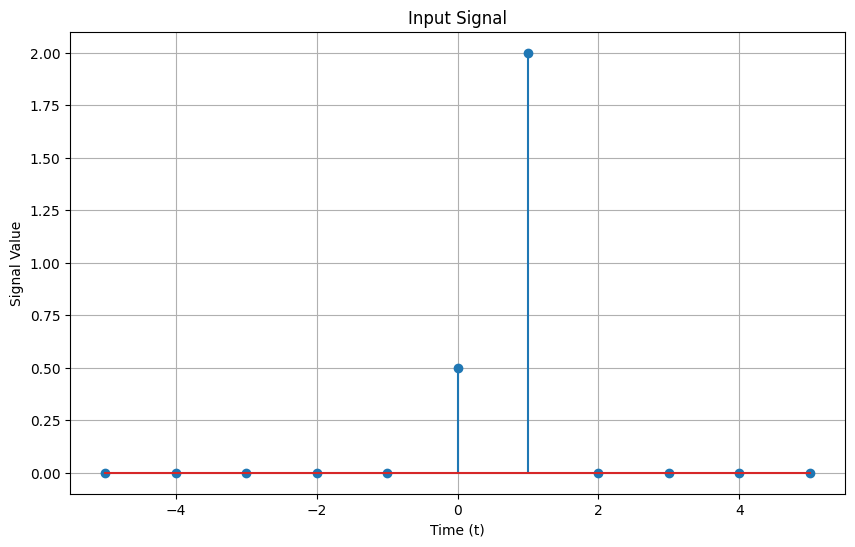

Plot saved as Discrete/Input Signal.png
-5
-4
-3
-2
-1
0
1
2
3
4
5


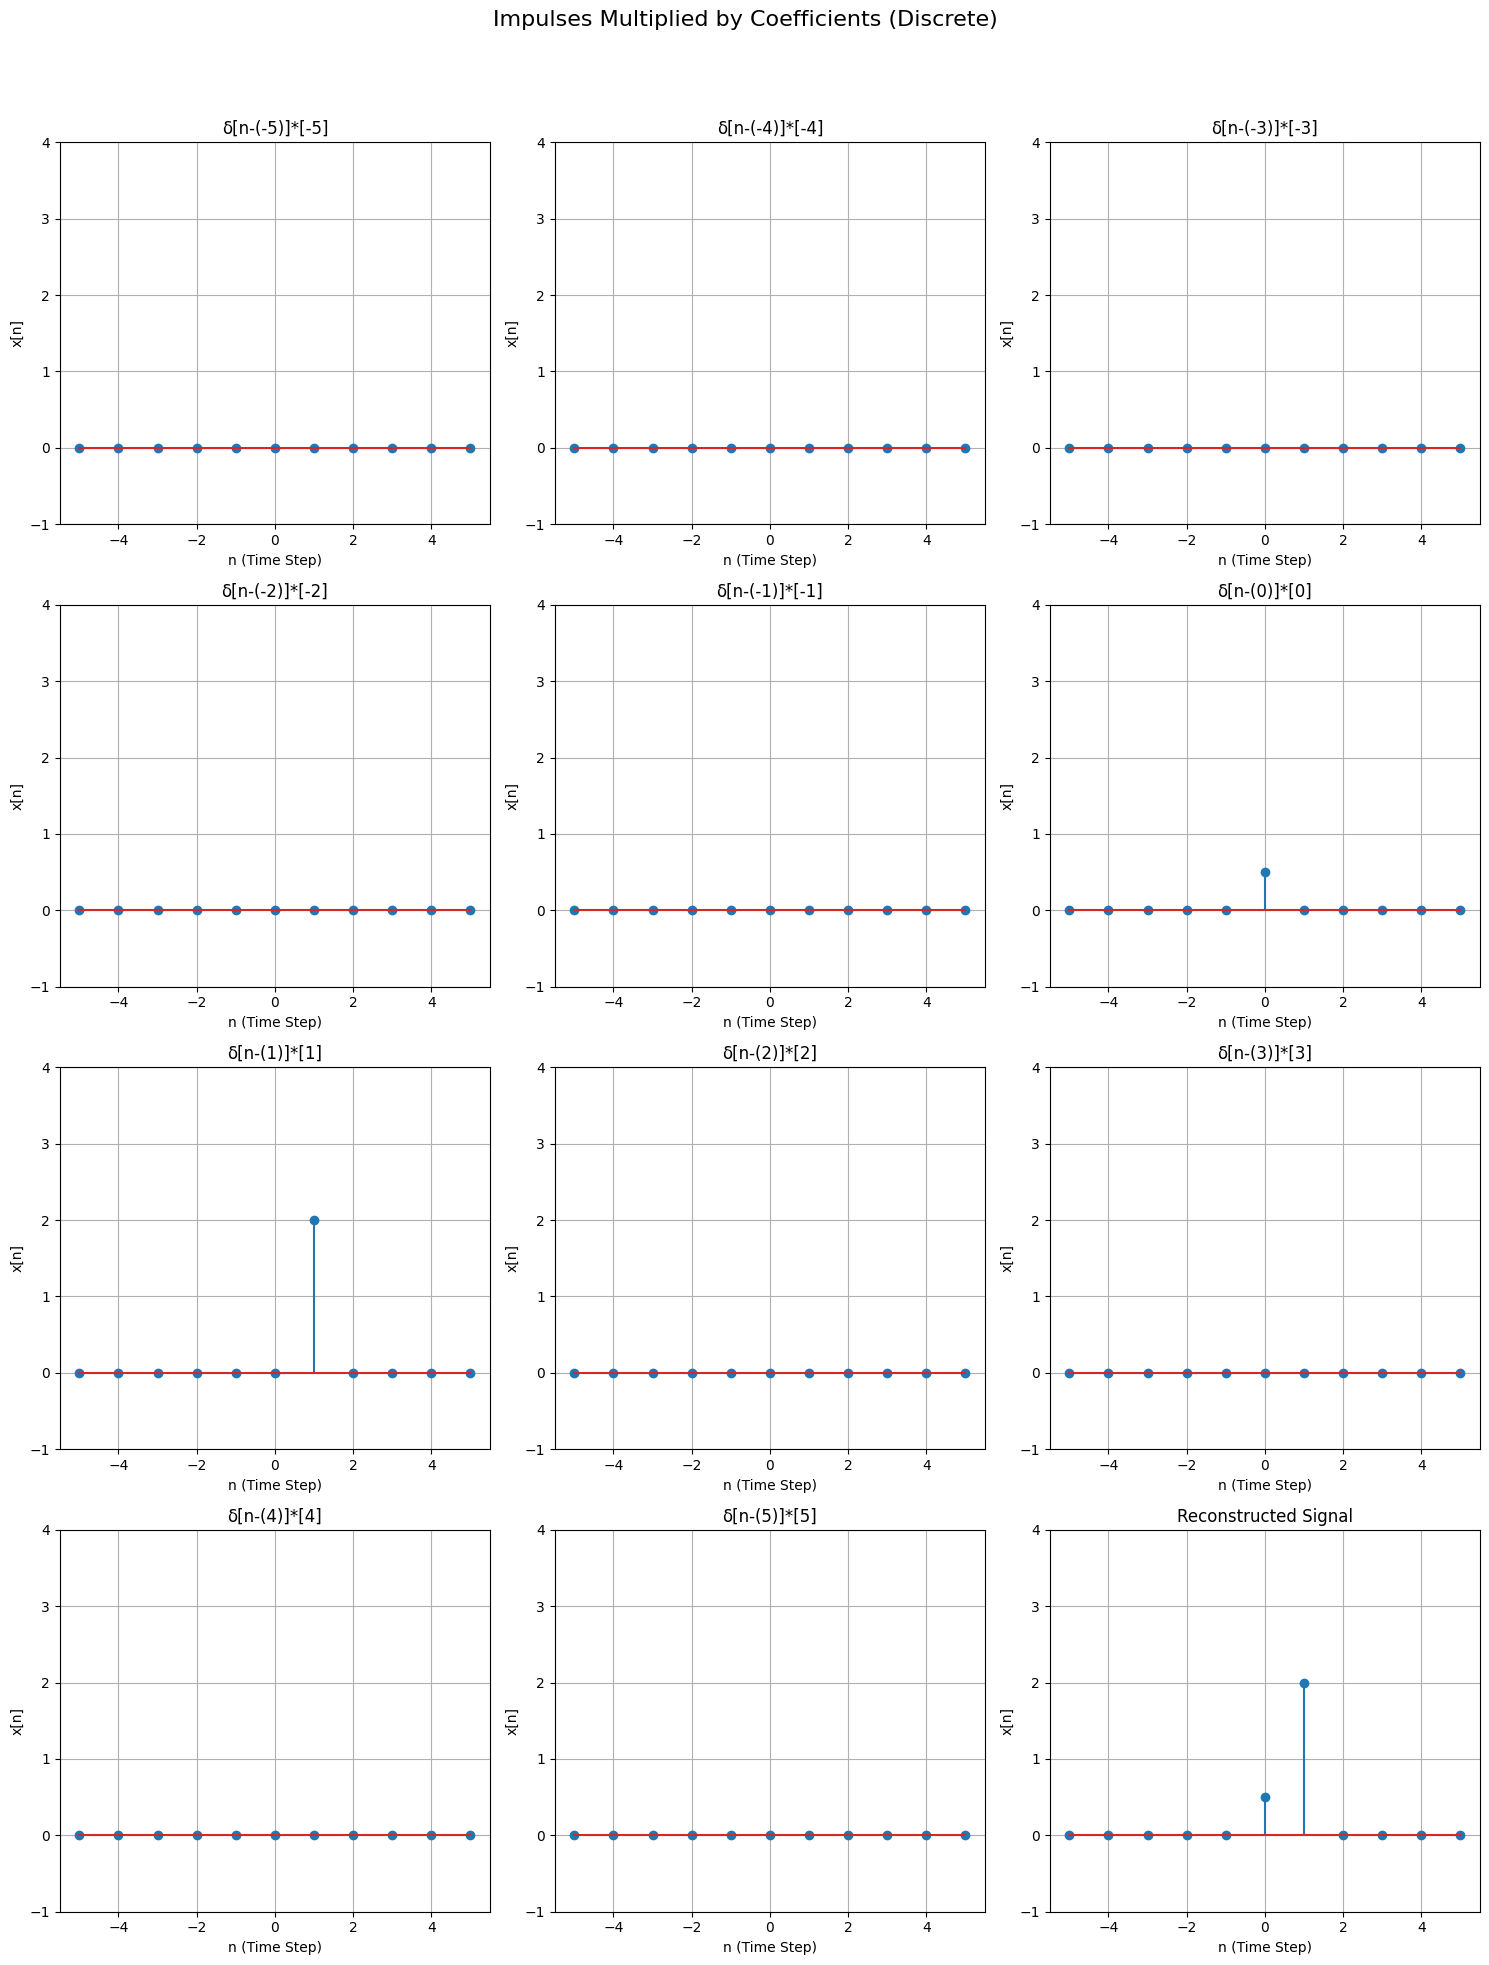

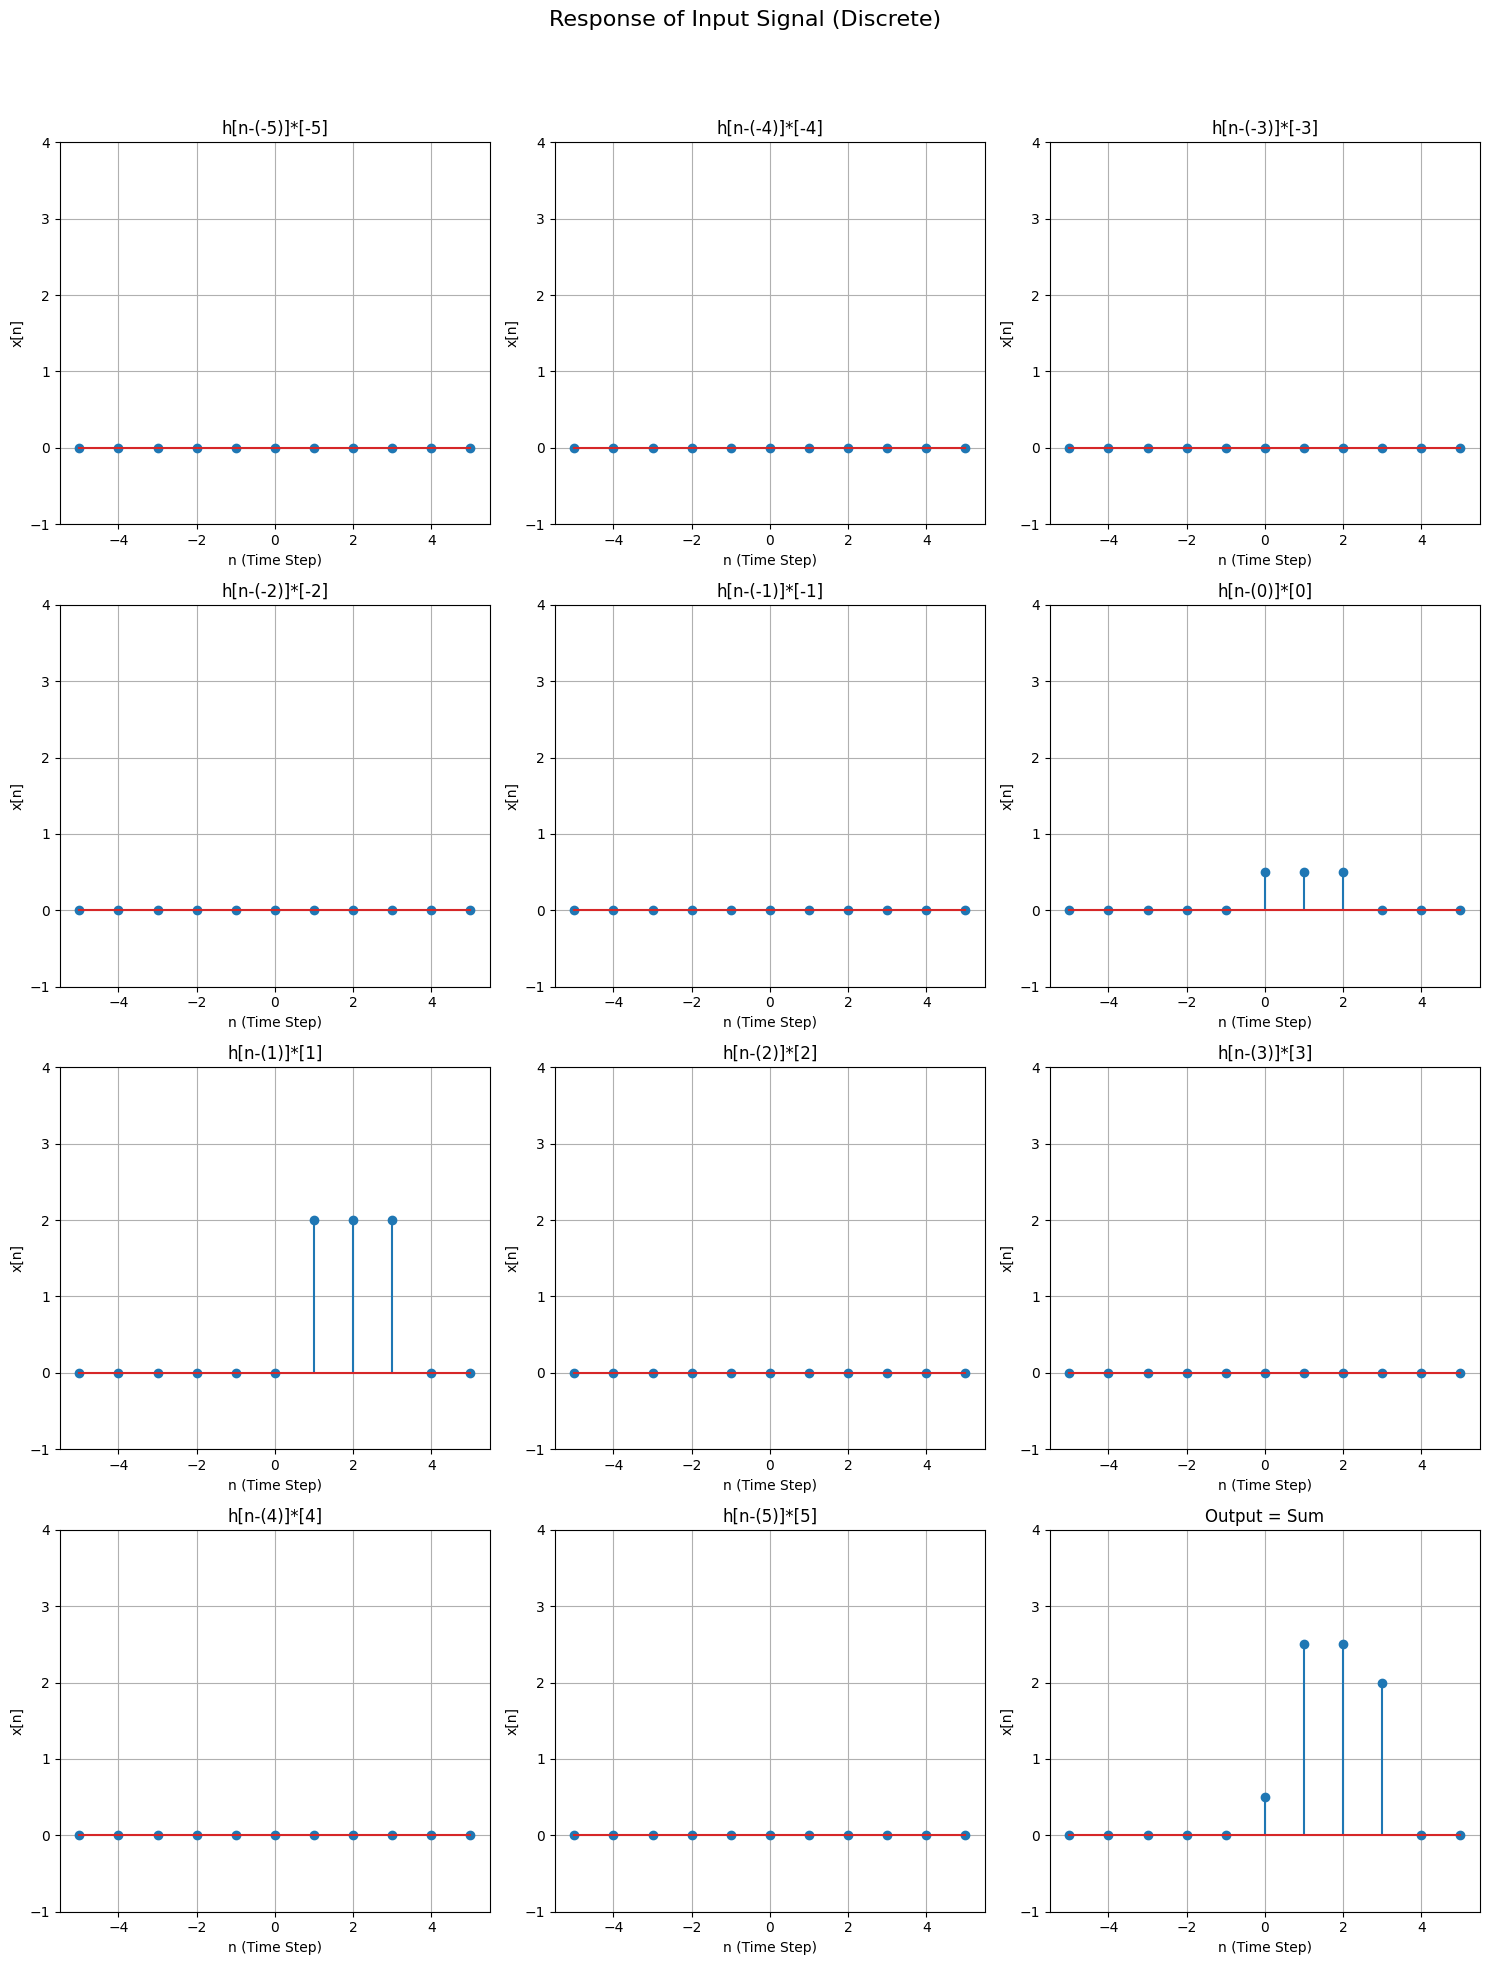

In [29]:
import numpy as np 
import matplotlib.pyplot as plt 
import os

class DiscreteSignal : 
    def __init__(self, INF):
        self.INF = INF
        self.values = np.zeros(2 * INF +1)  # Create a signal array of size 2 * INF + 1 (to cover -INF to INF)
        self.time_indices = np.arange(-INF, INF +1)

    def set_value_at_time(self, time, value):
        if -self.INF <= time <= self.INF:
            self.values[time + self.INF] = value  # Shift the index for proper placement
        else:
            raise ValueError("Time index out of range")

    def shift_signal(self, shift):
        shifted_signal = DiscreteSignal(self.INF)
        shifted_signal.values = np.roll(self.values, shift)
        return shifted_signal

    def add(self, other):
        if self.INF != other.INF:
            raise ValueError("Both signals must have the same INF value")
        added_signal = DiscreteSignal(self.INF)
        added_signal.values = self.values + other.values
        return added_signal

    def multiply(self, other):
        if self.INF != other.INF:
            raise ValueError("Both signals must have the same INF value")
        multiplied_signal = DiscreteSignal(self.INF)
        multiplied_signal.values = self.values * other.values
        return multiplied_signal

    def multiply_const_factor(self, factor):
        scaled_signal = DiscreteSignal(self.INF)
        scaled_signal.values = self.values * factor
        return scaled_signal

    def plot(self, title="Discrete Signal"):
        save_path = "Discrete"
        os.makedirs(save_path, exist_ok=True)
        save_filepath = os.path.join(save_path, f"{title}.png")
        
        # Generate discrete time points
        t_values = self.time_indices
        y_values = self.values

        plt.figure(figsize=(10, 6))
        plt.stem(t_values, y_values)  # Use stem plot for discrete signal
        plt.title(title)
        plt.xlabel('Time (t)')
        plt.ylabel('Signal Value')
        plt.grid(True)
        plt.savefig(save_filepath, dpi=300)  # Save the plot as a high-quality PNG file
        plt.show()

        print(f"Plot saved as {save_filepath}")



class LTI_Discrete:
    def __init__(self, impulse_response):
        self.impulse_response = impulse_response

    def linear_combination_of_impulses(self, input_signal):
        impulses = []
        coefficients = input_signal.values
        for t in range(-input_signal.INF, input_signal.INF+1):
            print(t)
            impulse = DiscreteSignal(input_signal.INF)
            impulse.set_value_at_time(t,1)
            impulses.append(impulse)
        return impulses, coefficients

    def output(self, input_signal):
        INF = input_signal.INF
        output_signal = DiscreteSignal(INF)
        constituent_impulses = []
        coefficients = input_signal.values
        # output_signal = DiscreteSignal( INF)
        for i in range(-INF, INF + 1):
            # coefficients.append(input_signal.values[INF + i])
            # response = self.impulse_response.shift_signal(i)
            # constituent_impulses.append(response)
            response = self.impulse_response.shift_signal(i)
            # response.set_value_at_time(i,1)
            constituent_impulses.append(response)
            output_signal = output_signal.add(
                response.multiply_const_factor(input_signal.values[INF + i])
            )
        return output_signal, constituent_impulses, coefficients

    def impulse_multiplied_by_coefficients_plot(self, input_signal):
        # Save figure path setup
        save_path = "Discrete"
        os.makedirs(save_path, exist_ok=True)
        save_filepath = os.path.join(save_path, "impulse_multiplied_by_coefficients_plot.png")

        impulses, coefficients = self.linear_combination_of_impulses(input_signal)
        num_plots = len(impulses)
        rows = num_plots // 3 + 1
        cols = 3
        fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
        fig.suptitle('Impulses Multiplied by Coefficients (Discrete)', fontsize=16)

        # Initialize reconstructed_signal as zero for discrete signals
        reconstructed_signal = DiscreteSignal(input_signal.INF)

        # Iterate over each impulse and its coefficient to plot them in the grid
        for idx, (imp, coeff) in enumerate(zip(impulses, coefficients)):
            # Determine the row and column for the subplot
            row = idx // cols
            col = idx % cols

            new_signal = imp.multiply_const_factor(coeff)
            reconstructed_signal = reconstructed_signal.add(new_signal)
            # t_values = np.arange(-input_signal.INF, input_signal.INF + self.step, self.step)
            # y_values = [new_signal.func(t) for t in t_values]
            t_values = new_signal.time_indices
            y_values = new_signal.values

            # Plot the signal in the corresponding subplot using stem plot
            ax = axes[row, col]
            ax.stem(t_values, y_values)
            ax.set_title(f'δ[n-({-imp.INF+idx})]*[{-imp.INF+idx}]')
            ax.set_xlabel('n (Time Step)')
            ax.set_ylabel('x[n]')
            ax.set_ylim(-1, 4)
            ax.grid(True)

        # Plot the reconstructed signal in the final position
        final_plot_idx = num_plots
        final_row = final_plot_idx // cols
        final_col = final_plot_idx % cols
        # t_values = np.arange(-input_signal.INF, input_signal.INF + self.step, self.step)
        t_values = reconstructed_signal.time_indices
        y_values = reconstructed_signal.values
        # y_values = [reconstructed_signal.func(t) for t in t_values]

        ax = axes[final_row, final_col]
        ax.stem(t_values, y_values)
        ax.set_title('Reconstructed Signal')
        ax.set_xlabel('n (Time Step)')
        ax.set_ylabel('x[n]')
        ax.set_ylim(-1, 4)
        ax.grid(True)

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.savefig(save_filepath, dpi=300)
        plt.show()

    def response_of_input_plot(self, input_signal):
        # Save figure path setup
        save_path = "Discrete"
        os.makedirs(save_path, exist_ok=True)
        save_filepath = os.path.join(save_path, "response_of_input_plot.png")

        output_signal, constituent_impulses, coefficients = self.output(input_signal)
        num_plots = len(constituent_impulses)
        rows = num_plots // 3 + 1
        cols = 3
        fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
        fig.suptitle('Response of Input Signal (Discrete)', fontsize=16)

        # Initialize reconstructed_signal as zero for discrete signals
        reconstructed_signal = DiscreteSignal(input_signal.INF)

        # Iterate over each impulse and its coefficient to plot them in the grid
        for idx, (imp, coeff) in enumerate(zip(constituent_impulses, coefficients)):
            # Determine the row and column for the subplot
            row = idx // cols
            col = idx % cols

            new_signal = imp.multiply_const_factor(coeff)
            reconstructed_signal = reconstructed_signal.add(new_signal)
            # t_values = np.arange(-input_signal.INF, input_signal.INF + self.step, self.step)
            # y_values = [new_signal.func(t) for t in t_values]
            t_values = new_signal.time_indices
            y_values = new_signal.values

            # Plot the signal in the corresponding subplot using stem plot
            ax = axes[row, col]
            ax.stem(t_values, y_values)
            ax.set_title(f'h[n-({-imp.INF+idx})]*[{-imp.INF+idx}]')
            ax.set_xlabel('n (Time Step)')
            ax.set_ylabel('x[n]')
            ax.set_ylim(-1, 4)
            ax.grid(True)

        # Plot the reconstructed signal in the final position
        final_plot_idx = num_plots
        final_row = final_plot_idx // cols
        final_col = final_plot_idx % cols
        # t_values = np.arange(-input_signal.INF, input_signal.INF + self.step, self.step)
        t_values = reconstructed_signal.time_indices
        y_values = reconstructed_signal.values
        # y_values = [reconstructed_signal.func(t) for t in t_values]

        ax = axes[final_row, final_col]
        ax.stem(t_values, y_values)
        ax.set_title('Output = Sum')
        ax.set_xlabel('n (Time Step)')
        ax.set_ylabel('x[n]')
        ax.set_ylim(-1, 4)
        ax.grid(True)

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.savefig(save_filepath, dpi=300)
        plt.show()








def main(): 
    #impulse Response 
    impulse_response = DiscreteSignal(5)
    impulse_response.set_value_at_time(0, 1)
    impulse_response.set_value_at_time(1, 1)
    impulse_response.set_value_at_time(2, 1)
    impulse_response.plot("Impulse Response")

    #Input Signal
    input_signal = DiscreteSignal(5)
    input_signal.set_value_at_time(0, 0.5)
    input_signal.set_value_at_time(1, 2)
    input_signal.plot("Input Signal")

    #LTI System
    lti_system = LTI_Discrete(impulse_response)
    lti_system.impulse_multiplied_by_coefficients_plot(input_signal)
    # lti_system.impulse_multiplied_by_coefficients_plot(impulse_response)
    lti_system.response_of_input_plot(input_signal)

if __name__ == "__main__":
    main()